In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#加载数据集
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 27s 6us/step


In [19]:
train_image.shape

(60000, 28, 28)

In [5]:
#归一化数据
train_image=train_image/255
test_image=test_image/255

In [14]:
train_image.shape

(60000, 28, 28)

In [7]:
#建立模型
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
#编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [21]:
#训练模型
model.fit(train_image,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4969 - acc: 0.8253
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3783 - acc: 0.8632
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3353 - acc: 0.8770
Epoch 4/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.3127 - acc: 0.8836
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2956 - acc: 0.8907


In [22]:
#模型评估
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 778us/step - loss: 0.3545 - acc: 0.8740


[0.35453715920448303, 0.8740000128746033]

In [23]:
train_label


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
#独热编码
train_label_onehot=tf.keras.utils.to_categorical(train_label)

In [26]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
test_label_onehot=tf.keras.utils.to_categorical(test_label)

In [29]:
test_label_onehot


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
#建立模型
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [31]:
#编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [32]:
#训练模型
model.fit(train_image,train_label_onehot,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.4963 - acc: 0.8253
Epoch 2/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.3754 - acc: 0.8643
Epoch 3/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.3358 - acc: 0.8777
Epoch 4/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.3124 - acc: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.2946 - acc: 0.8903


In [33]:
#模型预测
predict=model.predict(test_image)

In [34]:
predict

array([[2.10431108e-06, 1.17836607e-09, 3.49700491e-09, ...,
        1.63748153e-02, 5.87253339e-07, 9.75012958e-01],
       [2.27148135e-04, 9.99131444e-10, 9.98745441e-01, ...,
        1.31745226e-14, 1.61222516e-07, 3.99309275e-13],
       [3.08345818e-07, 9.99999642e-01, 2.40658093e-09, ...,
        4.27702272e-17, 1.06518794e-09, 9.33806920e-16],
       ...,
       [1.28688771e-04, 7.51906200e-08, 8.58024869e-05, ...,
        9.98555905e-09, 9.99135315e-01, 3.31917005e-09],
       [2.60253984e-07, 9.99988556e-01, 2.66765277e-08, ...,
        5.03127595e-10, 2.82541293e-07, 1.13631682e-08],
       [1.09087014e-04, 7.16862701e-07, 2.27512046e-05, ...,
        3.69885117e-02, 4.29927401e-04, 4.20378055e-04]], dtype=float32)

In [35]:
predict[0]

array([2.1043111e-06, 1.1783661e-09, 3.4970049e-09, 1.4638935e-08,
       1.2819772e-08, 8.6089317e-03, 5.1527655e-07, 1.6374815e-02,
       5.8725334e-07, 9.7501296e-01], dtype=float32)

In [36]:
np.argmax(predict[0])

9

In [37]:
test_label[0]

9

In [40]:
np.argmax(predict,axis=1).shape

(10000,)

### 欠拟合与过拟合问题

#### 过拟合：在训练数据上得分很高，在测试数据上得分相对比较低；


解决方案：（1）添加Dropout层；（2）增加训练数据；（3）减小网络容量；（4）添加正则化部分；

#### 欠拟合：在训练数据上得分较低，在测试数据上得分同样较低；

解决方案：（1）添加神经元个数；（2）添加网络层数；

In [42]:
#建立模型（过拟合模型）
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [44]:
#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [45]:
history=model.fit(train_image,train_label_onehot,
                  epochs=10,
                  validation_data=(test_image,test_label_onehot)
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4888 - acc: 0.8235 - val_loss: 0.4189 - val_acc: 0.8503
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - acc: 0.8653 - val_loss: 0.4057 - val_acc: 0.8499
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - acc: 0.8775 - val_loss: 0.3699 - val_acc: 0.8716.3296 - acc: 0.
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3081 - acc: 0.8849 - val_loss: 0.3731 - val_acc: 0.8627
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2901 - acc: 0.8922 - val_loss: 0.3632 - val_acc: 0.8675
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2779 - acc: 0.8967 - val_loss: 0.3397 - val_acc: 0.8782
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2644 - acc: 0.9005 - val_loss: 0.3393 - val_acc: 0.8793
Epoch 8/10
1875/1875 [=========================

In [46]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

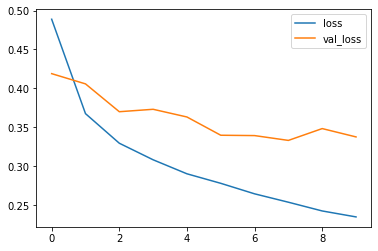

In [47]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

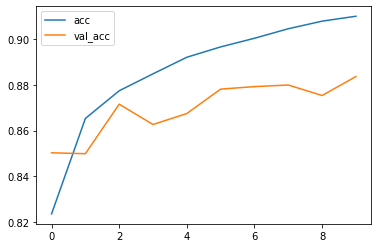

In [48]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

### 通过添加Dropout层的方式将上述过拟合模型进行修改

In [49]:
#建立模型（解决过拟合）
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [50]:
#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [51]:
history=model.fit(train_image,train_label_onehot,
                  epochs=10,
                  validation_data=(test_image,test_label_onehot)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8612 - acc: 0.6834 - val_loss: 0.5004 - val_acc: 0.8224
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6145 - acc: 0.7848 - val_loss: 0.4621 - val_acc: 0.8341
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5615 - acc: 0.8041 - val_loss: 0.4506 - val_acc: 0.8395
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5360 - acc: 0.8123 - val_loss: 0.4250 - val_acc: 0.8461
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5291 - acc: 0.8143 - val_loss: 0.4220 - val_acc: 0.8450
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5067 - acc: 0.8216 - val_loss: 0.4453 - val_acc: 0.8352
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5062 - acc: 0.8225 - val_loss: 0.4226 - val_acc: 0.8415
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

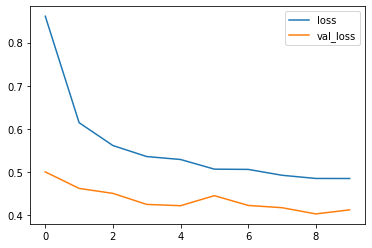

In [52]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

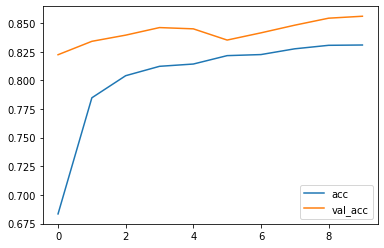

In [53]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()